## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, \
                            recall_score, f1_score, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

## Import Dataset

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis

In [7]:
df['target'].unique()

array([1, 0])

<Axes: xlabel='target', ylabel='count'>

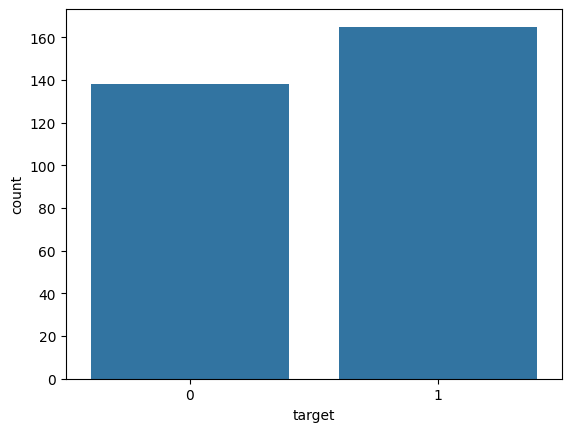

In [8]:
sns.countplot(data=df, x='target')

In [9]:
# sns.pairplot(data=df, hue='target')

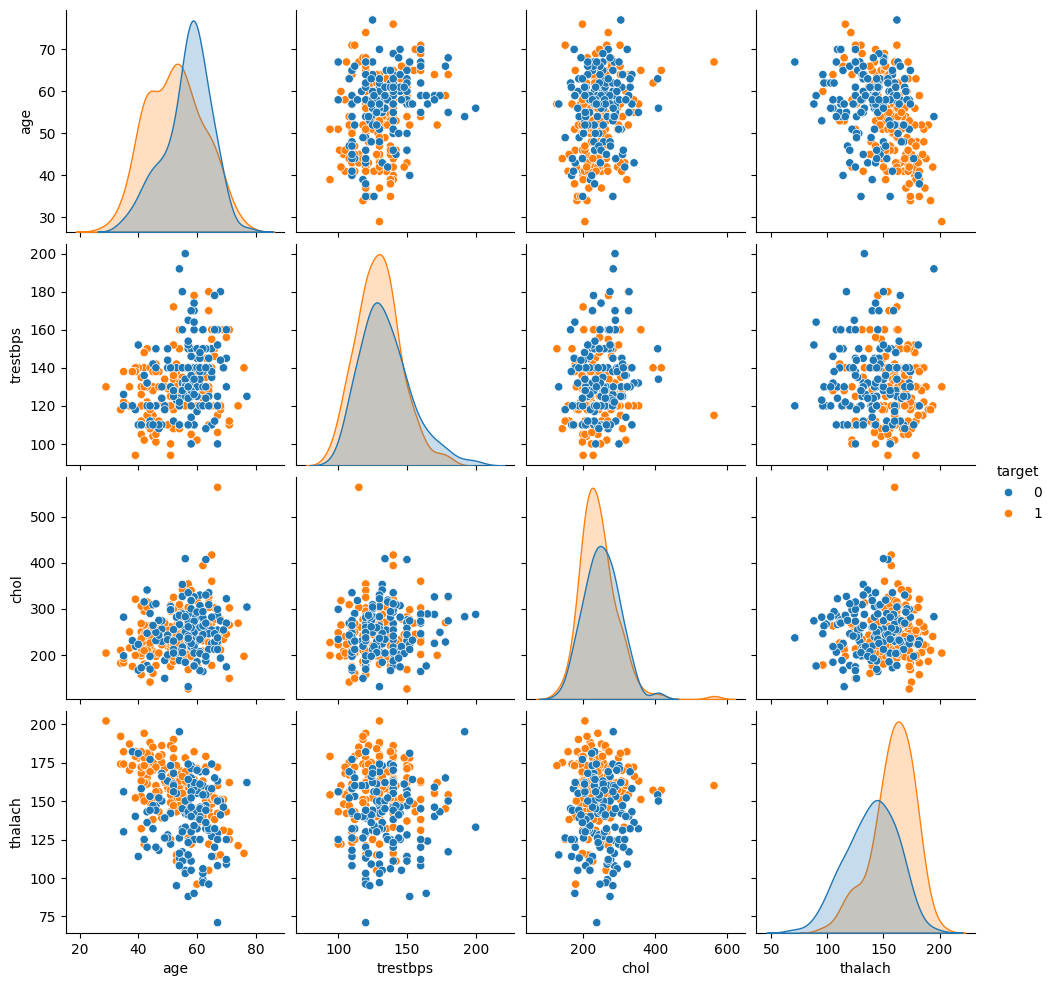

In [10]:
sns.pairplot(data=df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target')

<Axes: >

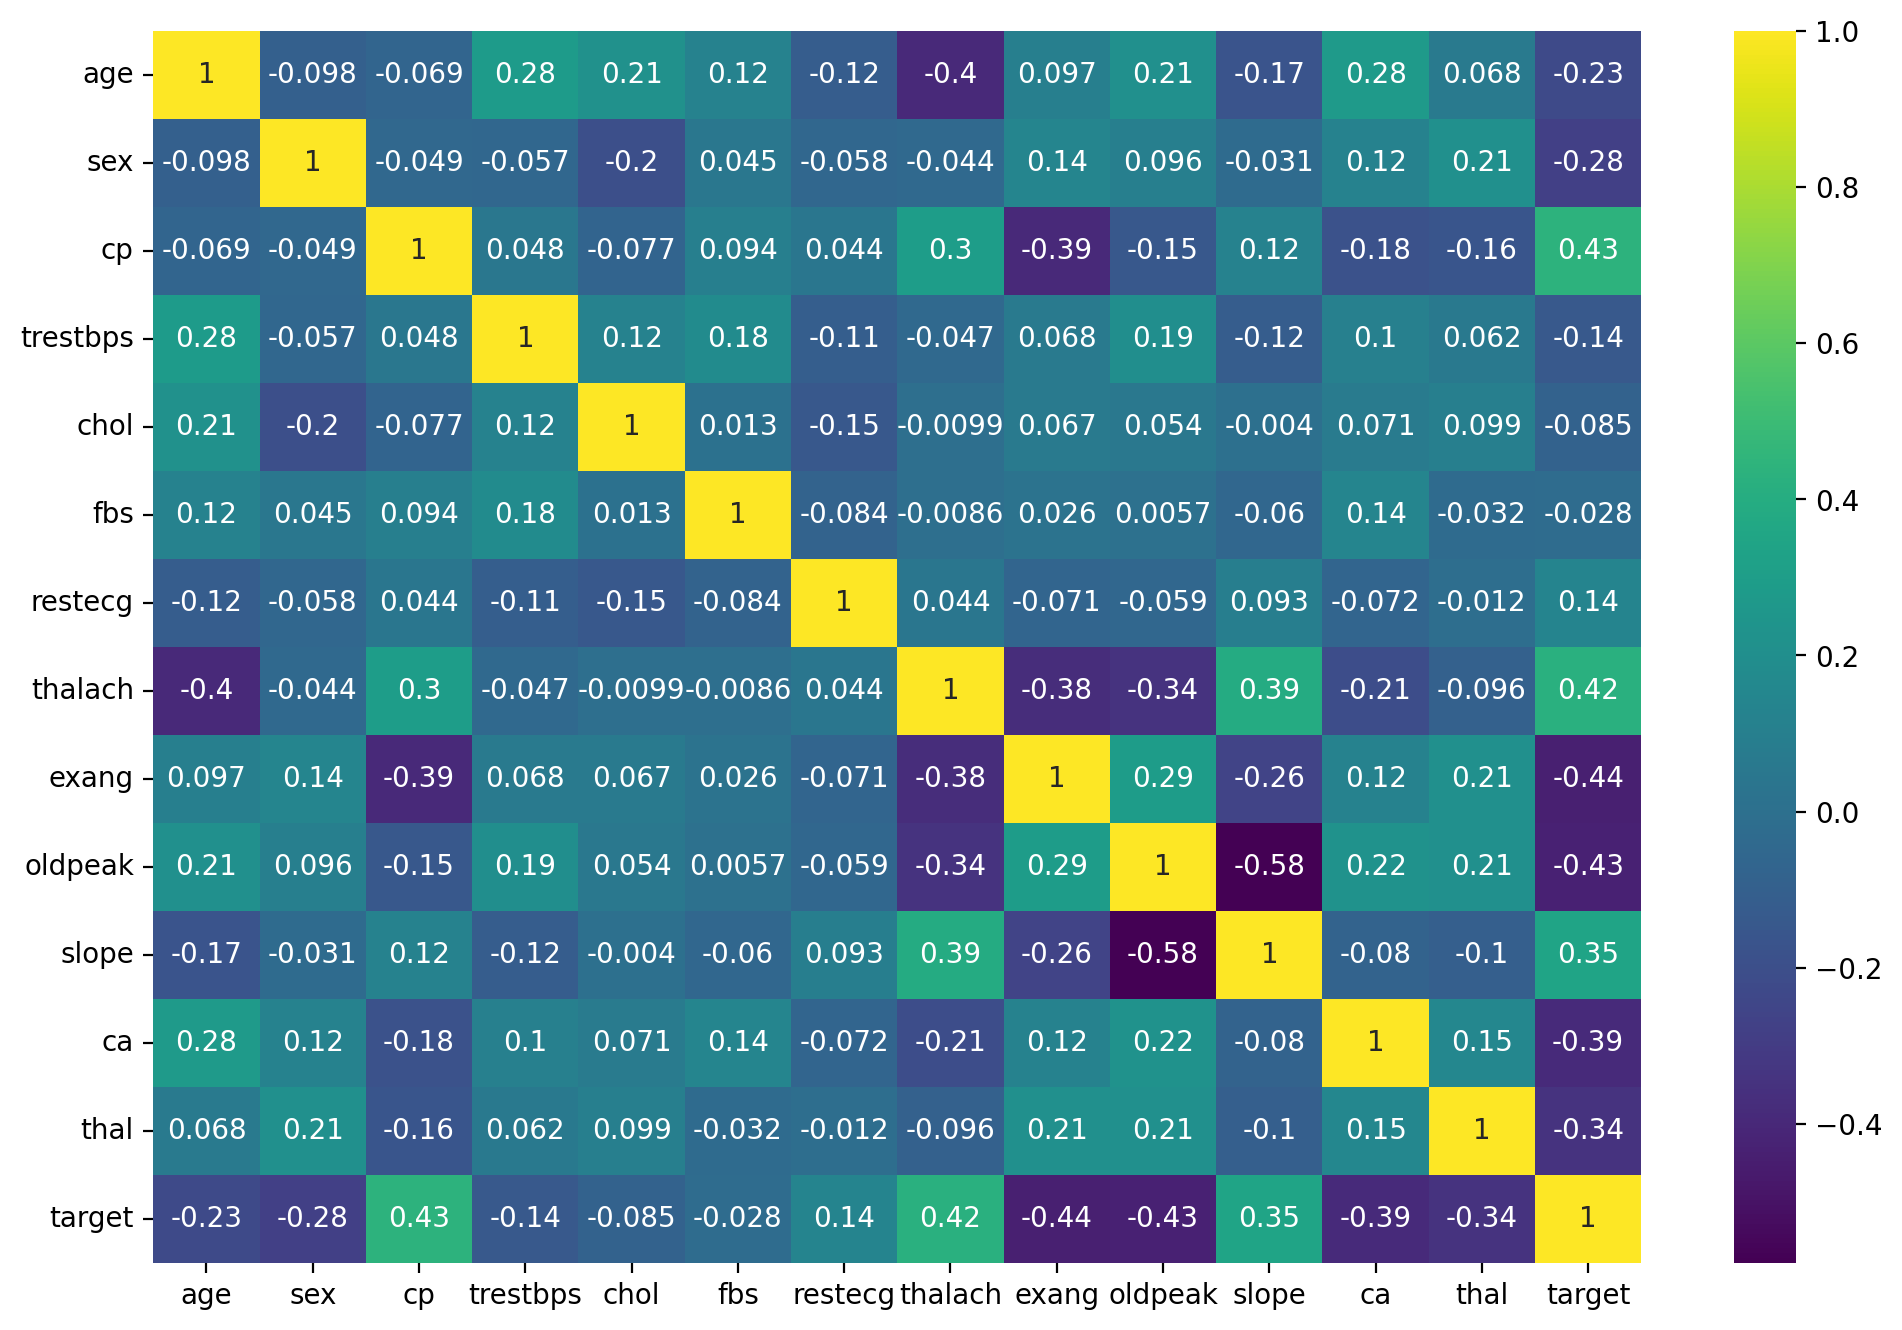

In [11]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')

## Splitting Data

In [12]:
X = df.drop('target', axis=1)

In [13]:
y = df['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Preprocessing

In [15]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Creating Model

In [16]:
model = LogisticRegression()

In [17]:
C = np.logspace(0, 10, 20)

param_grid = {'C':C}

In [18]:
grid_model = GridSearchCV(model, param_grid=param_grid)

In [19]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10])})

In [20]:
grid_model.best_params_

{'C': np.float64(3.3598182862837818)}

In [21]:
grid_model.best_estimator_.coef_

array([[-0.06913579, -0.76920653,  0.92721286, -0.27525963, -0.2274408 ,
         0.04629485,  0.1240757 ,  0.44699495, -0.43485773, -0.54217431,
         0.39432989, -0.88385718, -0.59170762]])

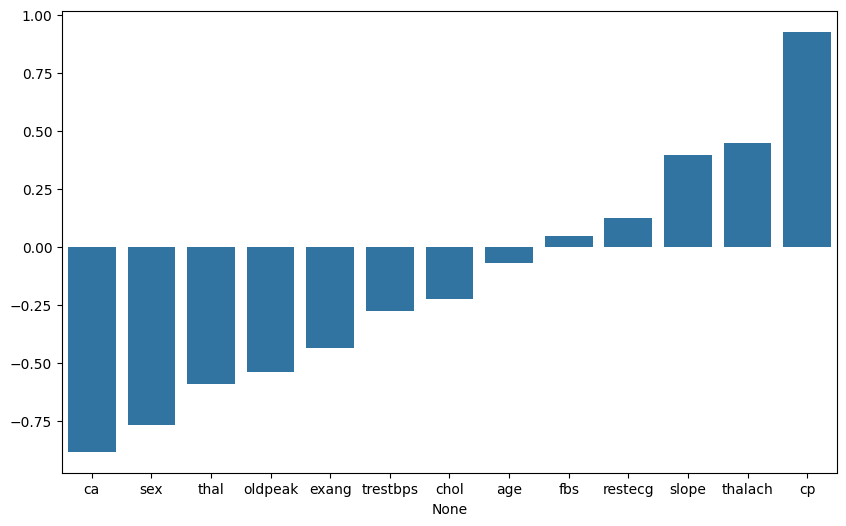

In [22]:
coefs = pd.Series(index=X.columns,data=grid_model.best_estimator_.coef_[0])
coefs = coefs.sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values);

## Prediction and Evaluation

In [23]:
prediction = grid_model.predict(scaled_X_test)

In [24]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



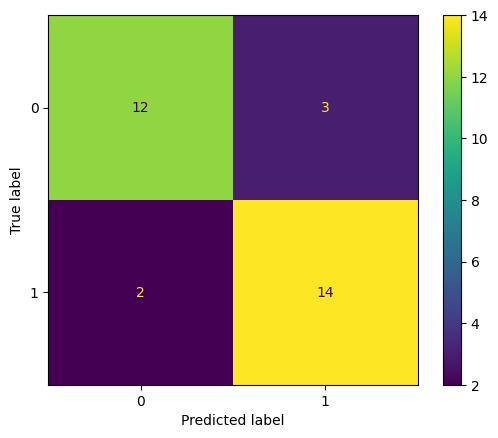

In [25]:
matrix = confusion_matrix(y_test, prediction)
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix)
confusion_matrix_plot.plot()

In [26]:
print(f"Accuracy Score: {accuracy_score(y_test, prediction)}")
print(f"Precision Score: {precision_score(y_test, prediction)}")
print(f"Recall Score: {recall_score(y_test, prediction)}")
print(f"F1 Score: {f1_score(y_test, prediction)}")

Accuracy Score: 0.8387096774193549
Precision Score: 0.8235294117647058
Recall Score: 0.875
F1 Score: 0.8484848484848485


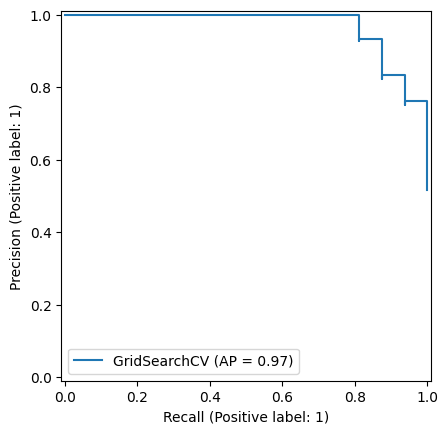

In [27]:
PrecisionRecallDisplay.from_estimator(grid_model, scaled_X_test, y_test)

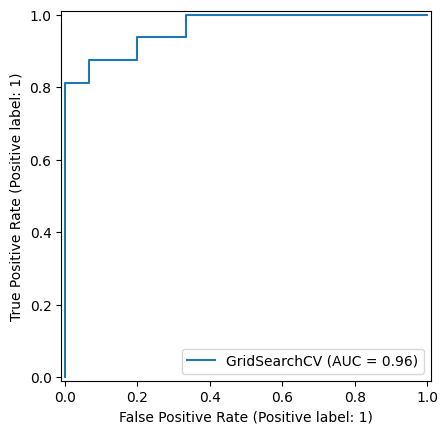

In [28]:
RocCurveDisplay.from_estimator(grid_model, scaled_X_test, y_test)

## Predicting New Data

**A patient with the following features has come into the medical office:**


    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

In [29]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [30]:
X_test.iloc[-1]

age          54.0
sex           1.0
cp            0.0
trestbps    122.0
chol        286.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         1.0
oldpeak       3.2
slope         1.0
ca            2.0
thal          2.0
Name: 268, dtype: float64

In [31]:
y_test.iloc[-1]

np.int64(0)

In [32]:
grid_model.predict(patient)

array([0])

In [33]:
grid_model.predict_proba(patient)

array([[1.00000000e+00, 5.64525297e-25]])